<a href="https://colab.research.google.com/github/Avinash-Reddy-Kovvuri/ARIMA_Model/blob/main/Auto-ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Madras-Drinkingwater-level-Prediction**
---







*   ## **Madras Drinkingwater level prediction using Machine learning Algorithms(Time_Series & ARIMA)**






Madras also known as **Chennai** is the capital city of indian state Tamil nadu.Actually due to the vast growth of city from 1893 to 2017 , areas of the surrounding floodplain, along with its lakes and ponds got disappeared which finally leads to the decreement of Chennai's water bodies from 12.6 square kilometers to about 3.2 square kilometers.And faced **water crises** in 2019 and declared "**Day Zero**" by the Chennai city officials on 19th June 2019







1.   To build a model, we need dataset which consists of past data and is only source for a **machine learning** to fed and predict the future estimations.And in particular for this project, we have considered 4 data sets to get clear insight of Chennai city **water crises** and fed to the model to predict.

  *   **Chennai Reservoir levels** : There were actually **4 main reservoirs** for the people of chennai to fullfill their daily needs as source and named as **POONDI, CHOLAVARAM, REDHILLS, CHEMBARAMBAKKAM**. And the data set consists of availability of water in them from 2004 to 2019 (day-by-day).

    *  **Final Reservior** : It is the souce for the people of chennai to use water and the data set named Final Reservior consists of water with the combination of 4 reserviors in MCFT(Million Cubic Feet) to fullfill daily needs of people in chennai(2014-2019).


2. The ML model is to be fitted on the Final Reservior data as mentioned above to predict the final value of water in MCFT(Million Cubic Feet) for people living in chennai city and other datasets are used to explore the influencing factors of the final value and to get insight about total forecsting technique.










*   ## **Importing Libraries and Dataset and pre-processing the data**




**Link for the dataset**
[click here](https://raw.githubusercontent.com/viditgarg1999/Chennai-Water-Level-Prediction/master/final_Reservior.csv)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
def parser(x):
  return pd.to_datetime(x)

different_chennai_reservoir_water_levels = pd.read_csv("/content/chennai_reservoir_levels.csv.csv",)

total_water_levels = pd.read_csv('/content/final_Reservior.csv', index_col = 0, parse_dates=[0], date_parser = parser)

In [ ]:
total_water_levels.shape

(5738, 1)

In [ ]:
total_water_levels.isna().sum()

Total    0
dtype: int64

The dataset has no null values. Now we can proceed further.

In [ ]:
different_chennai_reservoir_water_levels.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [ ]:
different_chennai_reservoir_water_levels.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
5733,12-09-2019,15.0,0.0,0.0,0.0
5734,13-09-2019,15.0,0.0,0.0,0.0
5735,14-09-2019,15.0,0.0,0.0,0.0
5736,15-09-2019,15.0,0.0,0.0,0.0
5737,16-09-2019,15.0,0.0,0.0,0.0


In [ ]:
total_water_levels.head()

,Total
Date,
2004-01-01,271.9
2004-01-02,271.9
2004-01-03,270.9
2004-01-04,270.9
2004-01-05,270.8


In [ ]:
total_water_levels.tail()

,Total
Date,
2019-09-12,15.0
2019-09-13,15.0
2019-09-14,15.0
2019-09-15,15.0
2019-09-16,15.0


In [ ]:
total_water_levels.head()

,Total
Date,
2004-01-01,271.9
2004-01-02,271.9
2004-01-03,270.9
2004-01-04,270.9
2004-01-05,270.8


In [ ]:
total_water_levels.head()

,Total
Date,
2004-01-01,271.9
2004-01-02,271.9
2004-01-03,270.9
2004-01-04,270.9
2004-01-05,270.8




---

*   ## **Data visualization / Preliminary visualization**

---







**Visualizing the contribution of each resevoir**

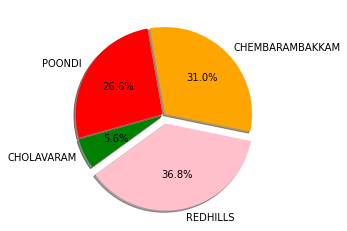

In [ ]:
poondi = pd.Series(different_chennai_reservoir_water_levels["POONDI"])
cholavaram = pd.Series(different_chennai_reservoir_water_levels["CHOLAVARAM"])
redhills = pd.Series(different_chennai_reservoir_water_levels["REDHILLS"])
chembarakkam = pd.Series(different_chennai_reservoir_water_levels["CHEMBARAMBAKKAM"])
labels=["POONDI", "CHOLAVARAM", "REDHILLS", "CHEMBARAMBAKKAM"]
dat = [poondi[:].mean(),cholavaram[:].mean(),redhills[:].mean(),chembarakkam[:].mean()]
plt.pie(dat,labels=labels,autopct='%1.1f%%',shadow=True,startangle=100,explode=(0.018, 0.018, 0.1, 0.018),colors=["red","green","pink","orange"])
plt.show()

**Resampling the data**

In [ ]:
total_water_levels = pd.DataFrame(total_water_levels['Total'].resample('MS').sum())

In [ ]:
total_water_levels.head()

,Total
Date,
2004-01-01,7932.90
2004-02-01,5592.50
2004-03-01,5284.36
2004-04-01,5514.40
2004-05-01,4736.50


**Visualizing the reservoir water levels from 2004 to 2019**

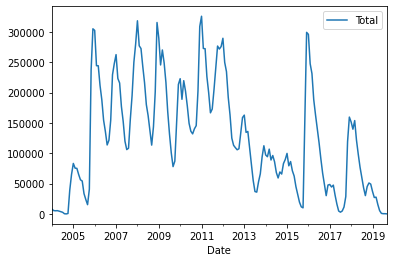

In [ ]:
total_water_levels.plot()

**Checking for stationarity of the data**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

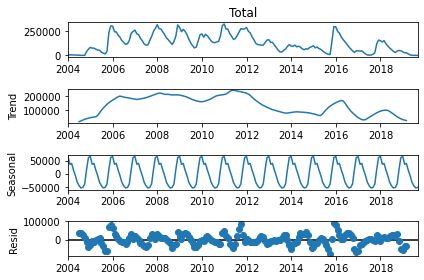

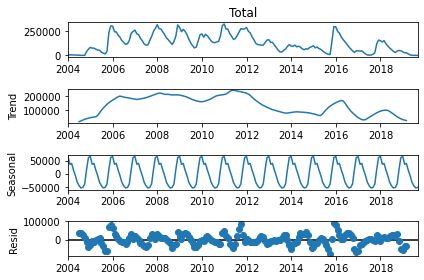

In [ ]:
result = seasonal_decompose(total_water_levels['Total'])
result.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(total_water_levels['Total'])
print("P value: ", res[1])

P value:  0.285103257648223


Here, P value is more than 0.05, whch indicates that data is non-stationary so we need to differentitate the data to make it stationary using diff() or we can pass the appropriate d value while training the model

In [ ]:
#  pip install pmdarima

In [ ]:
# pip uninstall statsmodels


In [ ]:
# pip install statsmodels

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Using the the auto arima model to get the appropriate values of p, d and q

In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(total_water_levels['Total'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 10, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True, 
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4101.362, Time=1.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4194.563, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4125.027, Time=0.50 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4099.481, Time=0.99 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4161.350, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4101.469, Time=1.01 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4101.471, Time=1.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4118.309, Time=0.50 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4103.241, Time=1.98 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4102.830, Time=0.90 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4103.689, Time=0.56 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=4104.400, Time=1.53 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=4101.222, Time=0.88 sec

Best model:  ARIMA(0,1,

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  189
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2046.741
Date:                            Mon, 16 May 2022   AIC                           4099.481
Time:                                    08:03:28   BIC                           4108.993
Sample:                                         0   HQIC                          4103.339
                                            - 189                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3935      0.082      4.781      0.000       0.232       0.555
ma.S.L12      -0.8399      0.075    -11.190      0.000      -0.987      -0.693
sigma2      1.084e+09   5.23e-11   2.07e+19      0.000    1.08e+09    1.08e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               780.17
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             1.74
Prob(H) (two-sided):                  0.09   Kurtosis:                        12.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.98e+34. Standard errors may be unstable.
"""

Splitting the data into train and test data

In [ ]:
train = total_water_levels.iloc[:len(total_water_levels)-24]
test = total_water_levels.iloc[len(total_water_levels)-24:]
  
# Fit a SARIMAX(0, 1, 1)x(0, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Total'], 
                order = (0, 1, 1), 
                seasonal_order =(0, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Total   No. Observations:                  165
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1772.764
Date:                            Mon, 16 May 2022   AIC                           3551.528
Time:                                    08:03:28   BIC                           3560.600
Sample:                                01-01-2004   HQIC                          3555.213
                                     - 09-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3927      0.086      4.575      0.000       0.224       0.561
ma.S.L12      -0.8224      0.079    -10.390      0.000      -0.978      -0.667
sigma2      1.128e+09   5.37e-11    2.1e+19      0.000    1.13e+09    1.13e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               677.68
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             1.85
Prob(H) (two-sided):                  0.07   Kurtosis:                        12.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.01e+34. Standard errors may be unstable.
"""

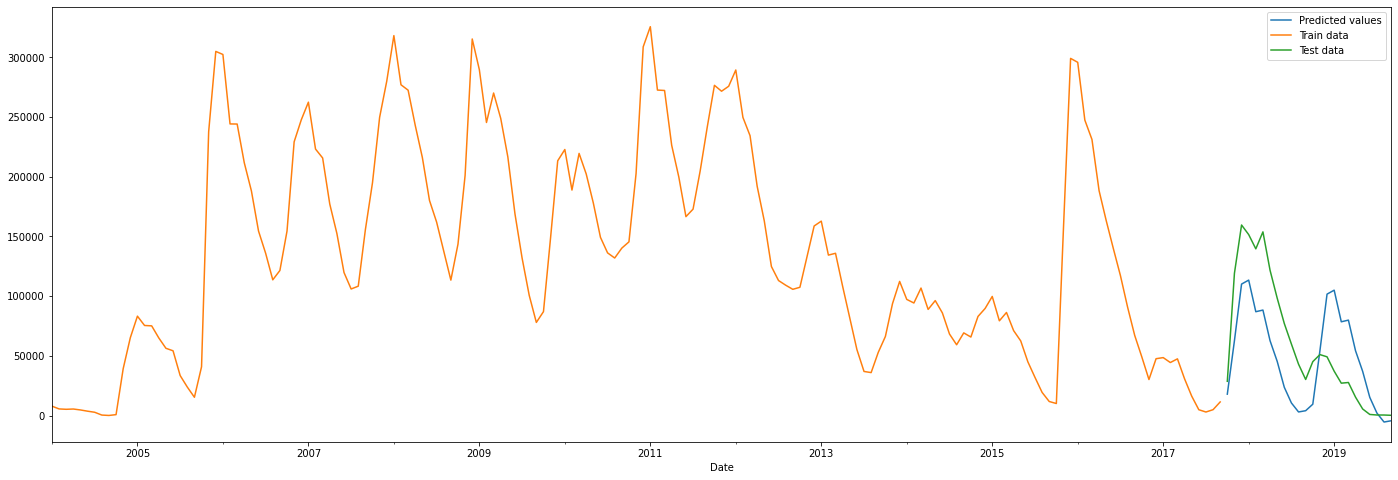

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'linear')

  
# plot predictions and actual values
predictions.plot(figsize = (24, 8), legend = True, label = "Predicted values")
train['Total'].plot(legend = True, label = "Train data")
test['Total'].plot(legend = True, label = "Test data")


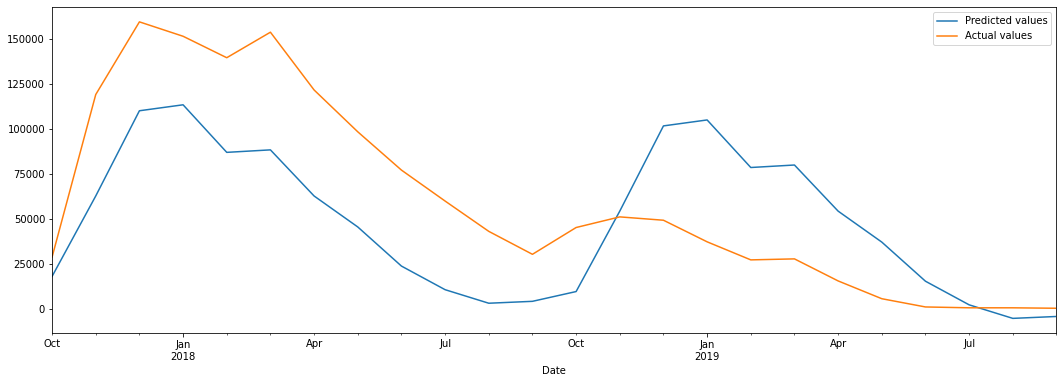

In [ ]:
predictions.plot(figsize = (18, 6), legend = True, label = "Predicted values")
test['Total'].plot(legend = True, label = "Actual values")


**Evaluating the model(accuracy)**

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test,predictions)
print(r2)

0.328433291531784


As r2_score is greater than 0, it means that the model is able to predict the values with the help of past data. The model fits well for the data.


In [ ]:
from sklearn.metrics import mean_squared_log_error
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import minmax_scale

  
test_new = minmax_scale(test['Total'], feature_range=(0, 1))
predictions_new = minmax_scale(predictions, feature_range=(0, 1))
rmsle = np.sqrt(mean_squared_log_error(test_new, predictions_new))
print(rmsle)


0.2064717547193458


As RMSLE is closer to 0, the model is performing well.

**FORECASTING FUTURE VALUES**

Now, we use the entire data to train the model to predict the future water levels(for the next 12 months)

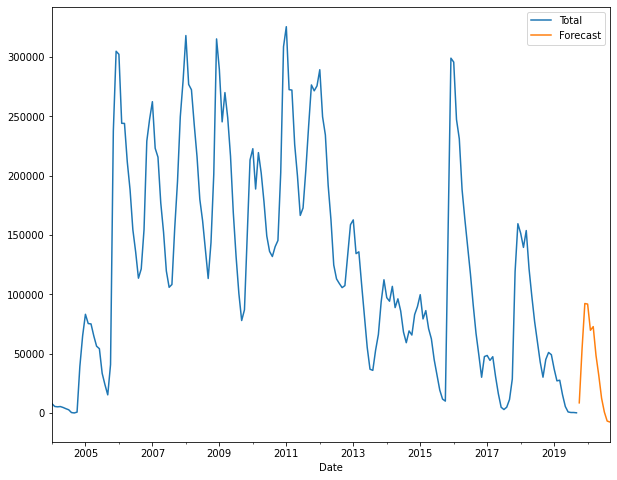

In [ ]:
model = model = SARIMAX(total_water_levels['Total'], 
                        order = (0, 1, 1), 
                        seasonal_order =(0, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 1 year
forecast = result.predict(start = len(total_water_levels), 
                          end = (len(total_water_levels)-1) + 1 * 12, 
                          typ = 'linear').rename('Forecast')
  
# Plot the forecast values
total_water_levels['Total'].plot(figsize = (10, 8), legend = True)
forecast.plot(legend = True)

One thing to notice here is that. The performance of the model detoriates if we go for further periods of time as the error is also being propagated. The model performs well for short - term predictions.